I'm trying to figure out how to select the best combination of particle sizes to match a grain size distribution. 
I need to interpret the four possible $Y$ sets.
I'm going to test several examples to see how the $Y$ sets change.


In [1]:
# Assume that Phi is {1, 1, 1}

# X is a sorted array of random integers between 1 and 10, inclusive. Duplicates are not allowed.
import random
import numpy as np
from gsd_lib import GSD

In [2]:
xg = np.asarray(sorted(random.sample(range(1, 21), 5)))

print(xg)


[ 4  7  8 10 16]


In [3]:
di = 1
x11 = xg[0:-1] / (xg[-2])
x21 = xg[1:] / (xg[-2] )
x12 = xg[0:-1] / (xg[-1] )
x22 = xg[1:] / (xg[-1] )

# make the last element of all x's equal to 1
x11[-1] = 1
x21[-1] = 1
x12[-1] = 1
x22[-1] = 1

print(f"xg: {xg}")
print(f"x11: {x11}")
print(f"x21: {x21}")
print(f"x12: {x12}")
print(f"x22: {x22}")


xg: [ 4  7  8 10 16]
x11: [0.4 0.7 0.8 1. ]
x21: [0.7 0.8 1.  1. ]
x12: [0.25   0.4375 0.5    1.    ]
x22: [0.4375 0.5    0.625  1.    ]


In [5]:
# an empty list to hold the GSD objects
D = []
N = []
F = []
for r in [x11, x21, x12, x22]:
    weight = np.array([0.25, 0.25, 0.25, 0.25])
    d = GSD(bins=r, contents=weight, cont_type="weights", tol=0.0000001)
    D.append(d)
    N.append(d.order)  # sum(d.min_particles)
    F.append(np.array([float(f) for f in d.nu_n]))


print(N)

TypeError: GSD.__init__() got an unexpected keyword argument 'bins'

In [6]:
for i, d in enumerate(D):
    print(f"D[{i}].bins: {d.bins}")
    # print(f"D[{i}].xi: {d.xi_n}")
    print(f"D[{i}].nu: {d.nu_n}")
    print(f"F[{i}]: {F[i]}")
    print(f"mp/F[{i}]: {d.min_particles / F[i]}")
    print(f"D[{i}].min_particles: {d.min_particles}")
    print(f"D[{i}].total: {sum(d.min_particles)}")
    print()  # for better readability

In [7]:
# [13, 3, 2, 1]
# [43, 13, 3, 1]
# 27 * (2.37037037-2). [5, 2, 1, 1]; [11, 5, 2, 1]
q = np.array([10, 4, 2, 2])
v = 1/q
# r is the cubed root of v
r = xg[-1] * v ** (1 / 3)
print(f"q: {q}")
print(f"v: {v}")
print(f"r: {r}")

q: [10  4  2  2]
v: [0.1  0.25 0.5  0.5 ]
r: [ 7.42654213 10.0793684  12.69920842 12.69920842]


In [8]:
13**3 / 12**3

1.271412037037037

In [9]:
xg

array([ 4,  7,  8, 10, 16])

OK, I think I've got something.

If you choose the smallest integer between the fractional values of $Y$ for the same largest particle size, you will be able to find a size between the respective limits that will produce a distribution with that number of particles that matches the grain size distribution.

In [10]:
# 343/64, 343/125, 343/216, 343/343
# [5.359375   2.744      1.58796296 1.        ]
# 512/64, 512/125, 512/216, 512/512
# [8.         4.096      2.37037037 1.        ]
for i in range (1,5):
    print(i*216)


216
432
648
864


In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib widget


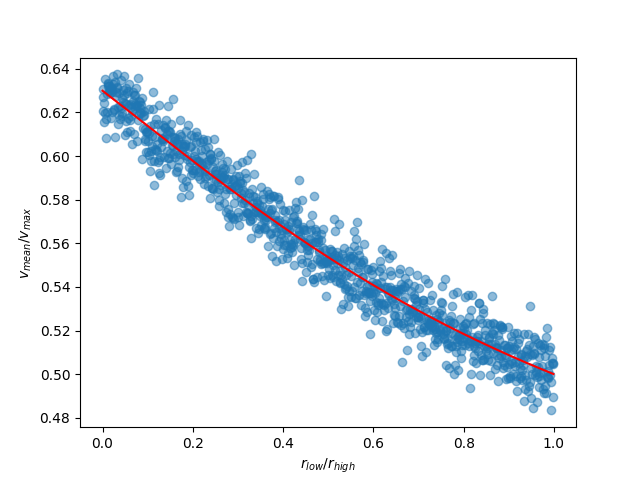

In [12]:
def v_rep(r_low, r_high, size=1000, verbose=False):
    """
    Calculate the parameter 'p' from the radius of the mean volume of spheres with random uniformly distributed radii.
    """
    r = stats.uniform.rvs(loc=r_low, scale=r_high - r_low, size=size)
    v = (4 / 3) * np.pi * (r**3)
    v_max = max(v)
    v_mean = np.mean(v)
    r_v_mean = (3 * v_mean / (4 * np.pi)) ** (1 / 3)

    return (r_v_mean - r_low) / (r_high - r_low)

def p_analytical(r_low, r_high):
    return (1/4 - r_low/r_high/8) ** (1 / 3)

def v_avg(x_low, x_high):
    return (x_high**2 + x_low**2) * (x_high + x_low) / 4


# def p(x_low, x_high):
#     return (v_avg(x_low, x_high)**(1/3) - x_low) / (x_high - x_low)


def p1(x_low, x_high, epsilon=1e-10):
    q = v_avg(x_low, x_high) ** (1 / 3)
    n = q * (x_high + x_low) - x_low**2 - x_low * x_high
    d = x_high**2 - x_low**2

    return n / d

v_p_analytical =  np.vectorize(p_analytical)

r_high = 1
r_low = 0
size = 1000
r_ratio = np.linspace(0, 0.999, size)
p = []
for r in r_ratio:
    p.append(v_rep(r_high * r, r_high))

plt.close("all")
plt.scatter(r_ratio, p, marker="o", alpha=0.5)
plt.plot(r_ratio, p1(r_ratio, r_high), color="red", label="Analytical")
plt.xlabel("$r_{low}/r_{high}$")
plt.ylabel("$v_{mean}/v_{max}$")

plt.show()

In [ ]:
0.25**(1/3)

0.6299605249474366

In [ ]:
0.5**3

0.125